In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# Задание 1
Численное решение системы диф. уравнений, моделирующей падение тела с учетом сопротивления среды, методом Эйлера-Коши

$$F_d(v) =k_1v+k_2v^2$$
$$\left\{ \begin{array}{cl}
\frac{dv}{dt} = g - \frac{k_1}{m}v(t)-\frac{k_2}{m}v(t)^2 \\
\frac{dy}{dt} = v(t) \\
\end{array} \right.$$

In [ ]:
def euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N):
    time = np.linspace(T0, T, N)
    res = np.zeros((4, N))
    res[0] = np.arange(0, N, 1)  # Номер шага
    res[1] = time              # Моменты времени
    res[2, 0] = v0             # Начальное значение скорости
    res[3, 0] = y0             # Начальное значение координаты

    y_prev = y0
    v_prev = v0
    for i in range(1, N):
        tau = time[i] - time[i - 1]

        v_pred = v_prev + tau * (9.806 - (k1/m) * v_prev - (k2/m) * v_prev**2)
        y_pred = y_prev + tau * v_prev

        f_prev = 9.806 - (k1/m) * v_prev - (k2/m) * v_prev**2
        f_pred = 9.806 - (k1/m) * v_pred - (k2/m) * v_pred**2

        v = v_prev + tau * 0.5 * (f_prev + f_pred)
        y = y_prev + tau * 0.5 * (v_prev + v)

        res[2, i] = v
        res[3, i] = y

        y_prev, v_prev = y, v

    return res

In [ ]:
y0 = 0
v0 = 0
m = 1
k1 = 0.1
k2 = 0.05
T0 = 0
T = 10
N = 50

In [ ]:
k, tk, vk, yk = euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N)
df = pd.DataFrame({
    "Номер": k,
    "Момент времени": tk,
    "Выч. скорость": vk,
    "Выч. координата": yk
})
df.tail(10)

,Номер,Момент времени,Выч. скорость,Выч. координата
40,40.0,8.163265,13.039639,93.830516
41,41.0,8.367347,13.039714,96.491675
42,42.0,8.571429,13.039770,99.152847
43,43.0,8.775510,13.039813,101.814028
44,44.0,8.979592,13.039845,104.475218
45,45.0,9.183673,13.039869,107.136413
46,46.0,9.387755,13.039887,109.797613
47,47.0,9.591837,13.039901,112.458816
48,48.0,9.795918,13.039911,115.120021
49,49.0,10.000000,13.039919,117.781228


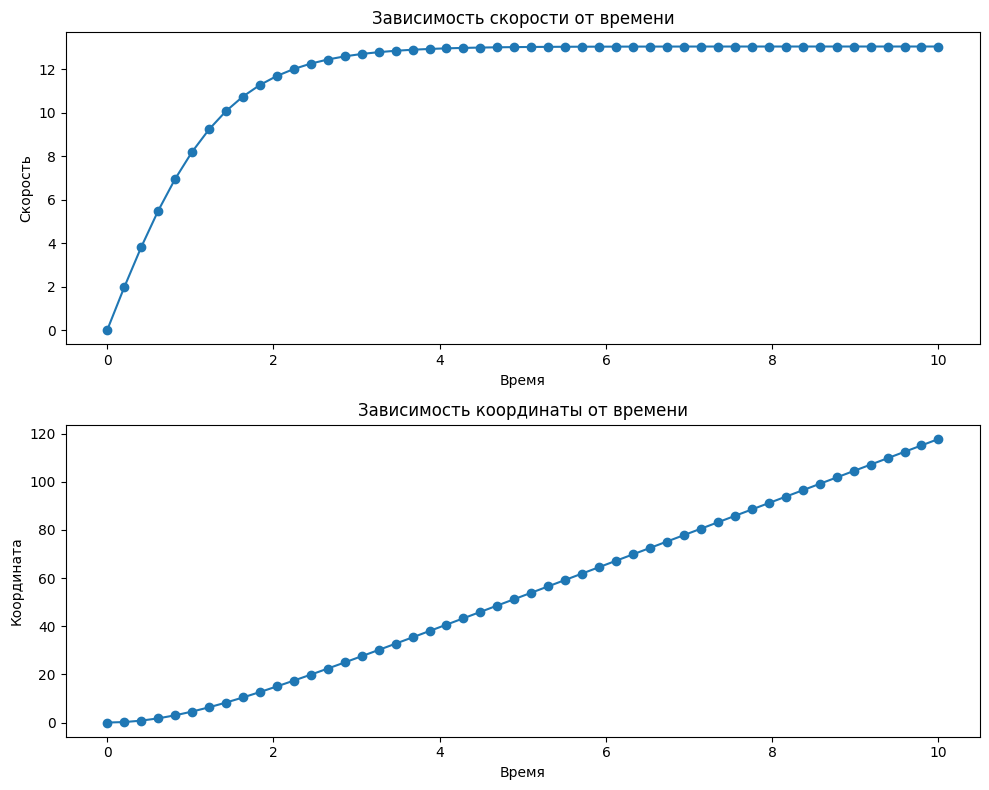

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(tk, vk, marker='o')
axs[0].set_title("Зависимость скорости от времени")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("Скорость")
axs[1].plot(tk, yk, marker='o')
axs[1].set_title("Зависимость координаты от времени")
axs[1].set_xlabel("Время")
axs[1].set_ylabel("Координата")
plt.tight_layout()
plt.show()

# Задание 2
Получить точное решение системы в случае линейной зависимости. С его помощью исследовать метод Эйлера-Коши на сходимость на серии сгущающихся сеток
$$\left\{ \begin{array}{cl}
\frac{dv}{dt} = g - \frac{k_1}{m}v(t) \\
\frac{dy}{dt} = v(t) \\
\end{array} \right.$$

$$v(t) = g\frac{m}{k}+(v_0-g\frac{m}{k})e^{-\frac{m}{k}t}$$
$$y(t)=g\frac{m}{k}t+(v_0-g\frac{m}{k})\frac{k}{m}(1-e^{-\frac{m}{k}t})$$


In [ ]:
def v_exact(t, m, k, v0):
    return 9.806 * m / k + (v0 - 9.806 * m / k) * np.exp(-k * t / m)

def y_exact(t, m, k, v0):
    return 9.806 * m / k * t + (v0 - 9.806 * m / k) * (m / k) * (1 - np.exp(-k * t / m))

In [ ]:
y0 = 0
v0 = 0
m = 1
k1 = 0.5
k2 = 0
T0 = 0
T = 5
M = 15

In [ ]:
v_exact_T = v_exact(T, m, k1, v0)
error_prev = 1
res_conv = np.zeros((3, M))
for i in range(M):
    N = 10 * 2**i
    k_arr, tk, vk, yk = euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N)
    tau = (T - T0) / N
    error = abs(v_exact_T - vk[-1])
    conv_ratio = math.log(error_prev / error, 2) if error != 0 else float('inf')
    res_conv[0, i] = tau
    res_conv[1, i] = error
    res_conv[2, i] = conv_ratio
    error_prev = error

In [ ]:
tau_arr, abs_error, conv_ratio_arr = res_conv
df_conv = pd.DataFrame({
    "Шаг": tau_arr,
    "Абс. погрешность": abs_error,
    "Коэф. сходимости": conv_ratio_arr
})
display(df_conv)

,Шаг,Абс. погрешность,Коэф. сходимости
0,0.500000,6.497274e-02,3.944022
1,0.250000,1.287018e-02,2.335803
2,0.125000,2.894798e-03,2.152497
3,0.062500,6.880304e-04,2.072919
4,0.031250,1.678055e-04,2.035683
5,0.015625,4.144115e-05,2.017654
6,0.007812,1.029742e-05,2.008781
7,0.003906,2.566554e-06,2.004379
8,0.001953,6.406667e-07,2.002187
9,0.000977,1.600455e-07,2.001092


# Задание 3
Моделирование вертикального падения пенопластового шарика
Сравнение с экспериментальными результатами

In [ ]:
m = 0.0025
r = 0.0254
c = 0.47
S = math.pi * r ** 2
p = 1.225

k1 = 0
k2 = 0.5 * c * S * p
T0 = 0
T = 0.932
v0 = 0
y0 = 0
N = 10

In [ ]:
exp_data = np.array([0.0, 0.075, 0.260, 0.525, 0.87, 1.27, 1.73, 2.23, 2.77, 3.35], dtype=np.float64)
k, tk, vk, yk = euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N)
df = pd.DataFrame({
    "Момент времени": tk,
    "Численное решение": yk,
    "Экс. данные": exp_data,
    "Абс. погрешность": abs(yk - exp_data)
})
df.tail(10)

,Момент времени,Численное решение,Экс. данные,Абс. погрешность
0,0.000000,0.000000,0.000,0.000000
1,0.103556,0.051933,0.075,0.023067
2,0.207111,0.205261,0.260,0.054739
3,0.310667,0.453035,0.525,0.071965
4,0.414222,0.785039,0.870,0.084961
5,0.517778,1.189310,1.270,0.080690
6,0.621333,1.653564,1.730,0.076436
7,0.724889,2.166262,2.230,0.063738
8,0.828444,2.717230,2.770,0.052770
9,0.932000,3.297916,3.350,0.052084


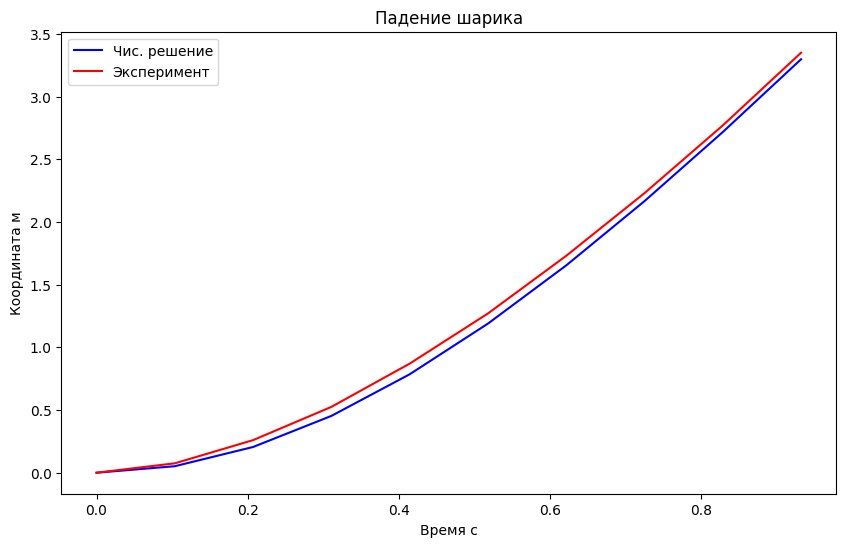

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(tk, yk, "b", label=f"Чис. решение")
plt.plot(tk, exp_data, "r", label=f"Эксперимент")
plt.title("Падение шарика")
plt.xlabel("Время с")
plt.ylabel("Координата м")
plt.legend()
plt.show()

# Задание 4.1 Вариант 9
В какой момент скорость спорстмена станет постоянной если он прыгает с парашютом имеющим форму шара радиус которого 2.5м масса спортсмена 80кг

In [ ]:
m = 80
r = 2.5
c = 0.4
p = 1.29
S = math.pi * r ** 2
k2 = 0.5 * S * c * p

k1 = 0
T0 = 0
T = 10
N = 100
v0 = 0
y0 = 0

In [ ]:
v_max = math.sqrt(9.81 * m / k2)
print(v_max)

12.446713676714092


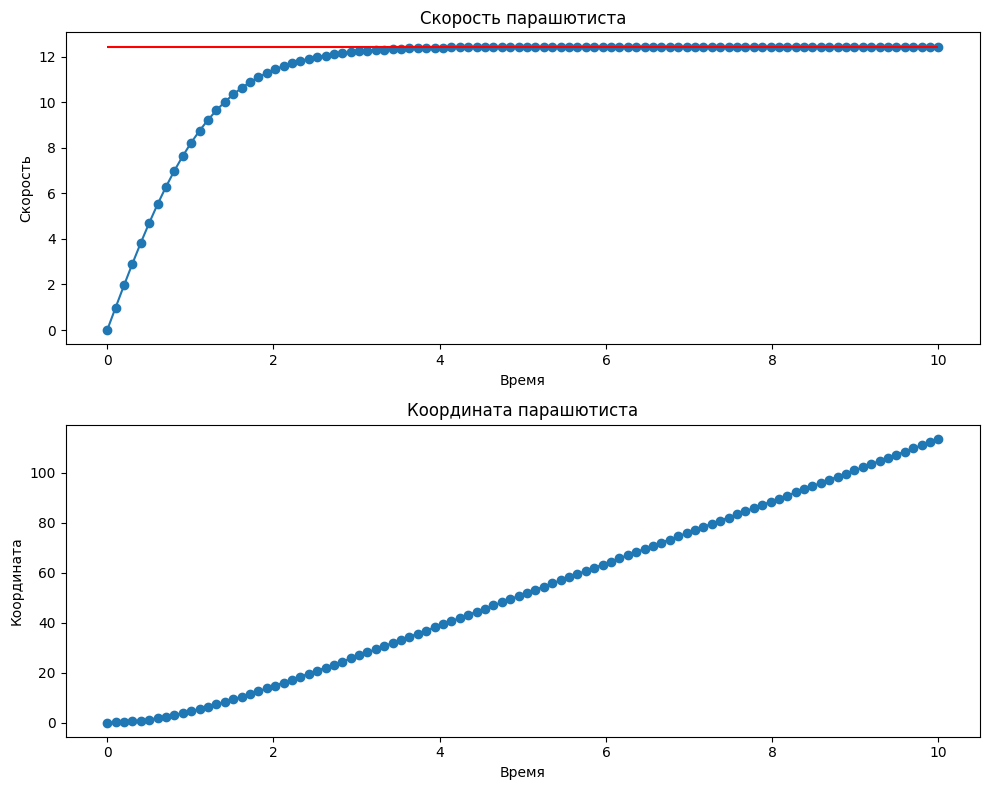

In [ ]:
k, tk, vk, yk = euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(tk, vk, marker='o')
axs[0].hlines(v_max, T0, T, color="red")
axs[0].set_title("Скорость парашютиста")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("Скорость")
axs[1].plot(tk, yk, marker='o')
axs[1].set_title("Координата парашютиста")
axs[1].set_xlabel("Время")
axs[1].set_ylabel("Координата")
plt.show()

# Задание 4.2 Вариант 9
Шар сделанный из меди радиуса 0.1м падает в мазуте встречая силу времени пропорциональную скорости. Найти изменение скорости и высоты при изменении времени

In [ ]:
def euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N, p, ps, V):
    time = np.linspace(T0, T, N)
    res = np.zeros((4, N))
    res[0] = np.arange(0, N, 1)  # Номер шага
    res[1] = time              # Моменты времени
    res[2, 0] = v0             # Начальное значение скорости
    res[3, 0] = y0             # Начальное значение координаты

    y_prev = y0
    v_prev = v0
    for i in range(1, N):
        tau = time[i] - time[i - 1]

        v_pred = v_prev + tau * (((p - ps) * V * 9.806) - k1 * v_prev) / m
        y_pred = y_prev + tau * v_prev

        f_prev = (((p - ps) * V * 9.806) - k1 * v_prev) / m
        f_pred = (((p - ps) * V * 9.806) - k1 * v_pred) / m

        v = v_prev + tau * 0.5 * (f_prev + f_pred)
        y = y_prev + tau * 0.5 * (v_prev + v)

        res[2, i] = v
        res[3, i] = y

        y_prev, v_prev = y, v

    return res

In [ ]:
r = 0.1
mu_liquid = 3.870
p_liquid = 800
p = 8890
V = (4/3) * math.pi * r ** 3
m = V * p
k1 = 6 * math.pi * mu_liquid * r
k2 = 0
T0 = 0
T = 30
N = 100
y0 = 0
v0 = 0
v_max = ((p - p_liquid) * V * 9.806) / (6 * math.pi * mu_liquid * r)

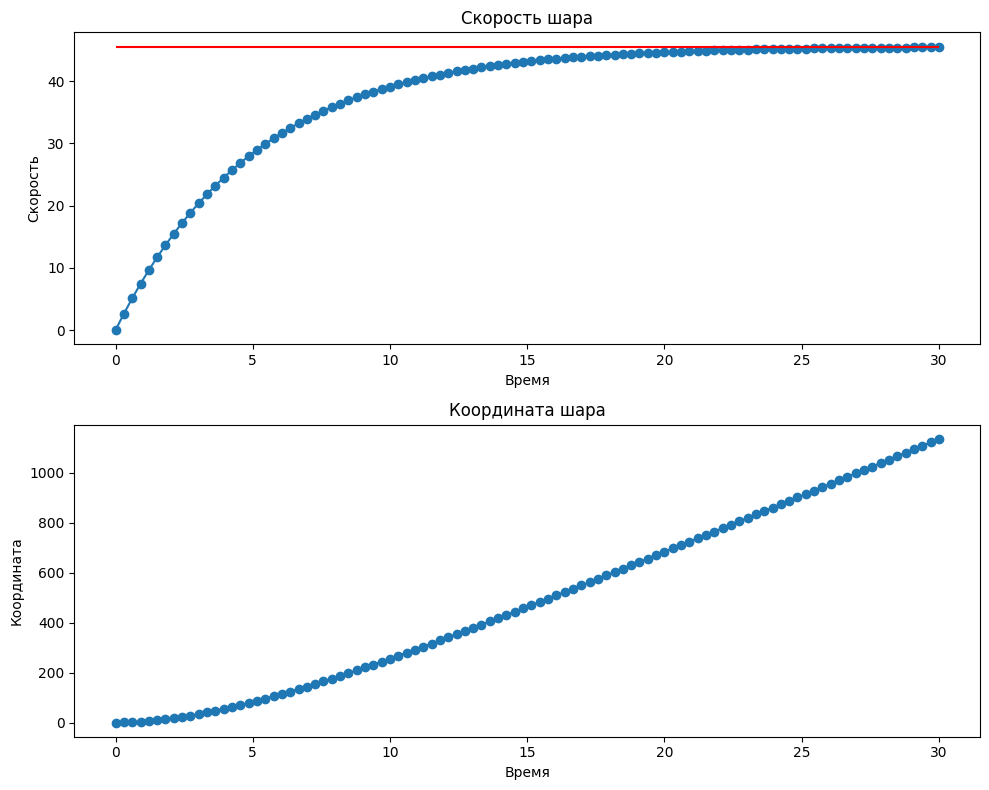

In [ ]:
k, tk, vk, yk = euler_cauchy_system(y0, v0, m, k1, k2, T0, T, N, p, p_liquid, V)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(tk, vk, marker='o')
axs[0].set_title("Скорость шара")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("Скорость")
axs[0].hlines(v_max, T0, T, color="red")
axs[1].plot(tk, yk, marker='o')
axs[1].set_title("Координата шара")
axs[1].set_xlabel("Время")
axs[1].set_ylabel("Координата")
plt.tight_layout()
plt.show()